In [42]:
import numpy as np
import graphtools
import pathlib
from tqdm import tqdm
import pickle
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [43]:
root_path = "../../synthetic_data4/"
data_names = ["noisy_1_groups_17580_3000_1_0.18_0.5_all","noisy_1_groups_17580_3000_1_0.25_0.5_all","noisy_1_groups_17580_3000_1_0.5_0.5_all","noisy_1_groups_17580_3000_1_0_0.5_all","noisy_1_paths_17580_3000_1_0.18_0.5_all","noisy_1_paths_17580_3000_1_0.25_0.5_all","noisy_1_paths_17580_3000_1_0.5_0.5_all","noisy_1_paths_17580_3000_1_0_0.5_all","noisy_2_groups_17580_3000_1_0.18_0.5_all","noisy_2_groups_17580_3000_1_0.25_0.5_all","noisy_2_groups_17580_3000_1_0.5_0.5_all","noisy_2_groups_17580_3000_1_0_0.5_all","noisy_2_paths_17580_3000_1_0.18_0.5_all","noisy_2_paths_17580_3000_1_0.25_0.5_all","noisy_2_paths_17580_3000_1_0.5_0.5_all","noisy_2_paths_17580_3000_1_0_0.5_all","noisy_3_groups_17580_3000_1_0.18_0.5_all","noisy_3_groups_17580_3000_1_0.25_0.5_all","noisy_3_groups_17580_3000_1_0.5_0.5_all","noisy_3_groups_17580_3000_1_0_0.5_all","noisy_3_paths_17580_3000_1_0.18_0.5_all","noisy_3_paths_17580_3000_1_0.25_0.5_all","noisy_3_paths_17580_3000_1_0.5_0.5_all","noisy_3_paths_17580_3000_1_0_0.5_all","noisy_4_groups_17580_3000_1_0.18_0.5_all","noisy_4_groups_17580_3000_1_0.25_0.5_all","noisy_4_groups_17580_3000_1_0.5_0.5_all","noisy_4_groups_17580_3000_1_0_0.5_all","noisy_4_paths_17580_3000_1_0.18_0.5_all","noisy_4_paths_17580_3000_1_0.25_0.5_all","noisy_4_paths_17580_3000_1_0.5_0.5_all","noisy_4_paths_17580_3000_1_0_0.5_all","noisy_5_groups_17580_3000_1_0.18_0.5_all","noisy_5_groups_17580_3000_1_0.25_0.5_all","noisy_5_groups_17580_3000_1_0.5_0.5_all","noisy_5_groups_17580_3000_1_0_0.5_all","noisy_5_paths_17580_3000_1_0.18_0.5_all","noisy_5_paths_17580_3000_1_0.25_0.5_all","noisy_5_paths_17580_3000_1_0.5_0.5_all","noisy_5_paths_17580_3000_1_0_0.5_all"]

In [44]:
with open("results_dijkstra.pkl","rb") as f:
    dijk_results = pickle.load(f)
with open("results_dijkstra_knn30.pkl","rb") as f:
    dijk30_results = pickle.load(f)

In [45]:
res_path = 'results_fast_10'
our_results = {}
density_results = {}
no_density_results = {}
for name in tqdm(data_names):
    try:
        our_res = np.load(f'{res_path}/{name}/ours.npz')
        our_results[name] = our_res['geodesic_lengths']
    except:
        our_results[name] = np.nan
    try:
        density_res = np.load(f'{res_path}/{name}/density.npz')
        density_results[name] = density_res['geodesic_lengths']
    except:
        density_results[name] = np.nan
    try:
        no_density_res = np.load(f'{res_path}/{name}/no_density.npz')
        no_density_results[name] = no_density_res['geodesic_lengths']
    except:
        no_density_results[name] = np.nan

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:01<00:00, 38.77it/s]


In [46]:
our_res['geodesic_lengths']

array([187.76129, 202.39667, 214.05817, 220.18933, 170.50095, 196.62268,
       174.27911, 203.63258, 147.56581, 202.62743, 205.22644, 191.02347,
       240.86789, 205.89925, 192.03178, 210.32008, 222.02136, 202.74588,
       180.56882, 248.46327], dtype=float32)

In [47]:
# results = {}
mses = {}
corrs = {}
spearmans = {}
r2scores = {}
for name in tqdm(data_names):
    # data = np.load(f"{root_path}/{name}.npz")
    # G = graphtools.Graph(data['data'], knn=5, decay=None)
    # D = G.shortest_path(distance='data')
    splited_name = name.split("_")
    data_name_noiseless = f"true_{splited_name[1]}_{splited_name[2]}_{splited_name[3]}_{splited_name[4]}_{splited_name[5]}_all"
    data_gt = np.load(f"../../synthetic_data4/gt/{data_name_noiseless}.npz", allow_pickle=True)
    # pairs = data_gt['pairs']
    # ds = [D[p[0], p[1]] for p in pairs]
    # results[name] = ds
    # mses[name] = ((np.array(ds) - np.array(data_gt['ds']))**2).mean()
    # corrs[name] = np.corrcoef(ds, data_gt['ds'])[0,1]
    ds = dijk_results[name]
    ds30 = dijk30_results[name]
    try:
        ours_val = spearmanr(ds, our_results[name]).correlation
        ours_mses = ((np.array(our_results[name]) - np.array(data_gt['ds']))**2).mean()
        ours_corrs = np.corrcoef(our_results[name], data_gt['ds'])[0,1]
        ours_r2 = r2_score(data_gt['ds'], our_results[name])
    except:
        ours_val = np.nan
        ours_mses = np.nan
        ours_corrs = np.nan
        ours_r2 = np.nan
    try:
        density_val = spearmanr(ds, density_results[name]).correlation
        density_mses = ((np.array(density_results[name]) - np.array(data_gt['ds']))**2).mean()
        density_corrs = np.corrcoef(density_results[name], data_gt['ds'])[0,1]
        density_r2 = r2_score(data_gt['ds'], density_results[name])
    except:
        density_val = np.nan
        density_mses = np.nan
        density_corrs = np.nan
        density_r2 = np.nan
    try:
        no_density_val = spearmanr(ds, no_density_results[name]).correlation
        no_density_mses = ((np.array(no_density_results[name]) - np.array(data_gt['ds']))**2).mean()
        no_density_corrs = np.corrcoef(no_density_results[name], data_gt['ds'])[0,1]
        no_density_r2 = r2_score(data_gt['ds'], no_density_results[name])
    except:
        no_density_val = np.nan
        no_density_mses = np.nan
        no_density_corrs = np.nan
        no_density_r2 = np.nan
    spearmans[name] = {
        'ours': ours_val,
        'density': density_val,
        'no_density': no_density_val,
        'dijkstra': spearmanr(ds, data_gt['ds']).correlation,
        'dijkstra_knn30': spearmanr(ds30, data_gt['ds']).correlation
    }
    mses[name] = {
        'ours': ours_mses,
        'density': density_mses,
        'no_density': no_density_mses,
        'dijkstra': ((np.array(ds) - np.array(data_gt['ds']))**2).mean(),
        'dijkstra_knn30': ((np.array(ds30) - np.array(data_gt['ds']))**2).mean()
    }
    corrs[name] = {
        'ours': ours_corrs,
        'density': density_corrs,
        'no_density': no_density_corrs,
        'dijkstra': np.corrcoef(ds, data_gt['ds'])[0,1],
        'dijkstra_knn30': np.corrcoef(ds30, data_gt['ds'])[0,1]
    }
    r2scores[name] = {
        'ours': ours_r2,
        'density': density_r2,
        'no_density': no_density_r2,
        'dijkstra': r2_score(data_gt['ds'], ds),
        'dijkstra_knn30': r2_score(data_gt['ds'], ds30)
    }

100%|██████████| 40/40 [00:00<00:00, 85.15it/s]


/tmp/ipykernel_2986042/4049324360.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_no_exp.drop(['seed'], axis=1, inplace=True)


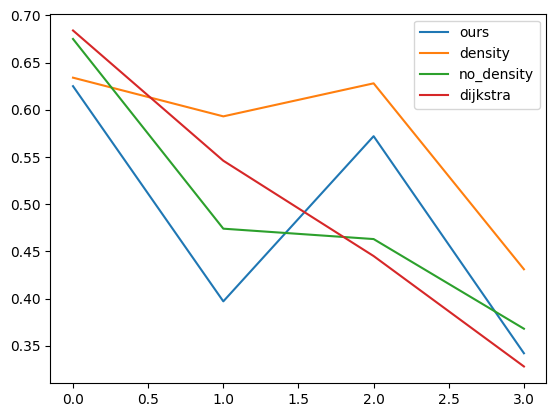

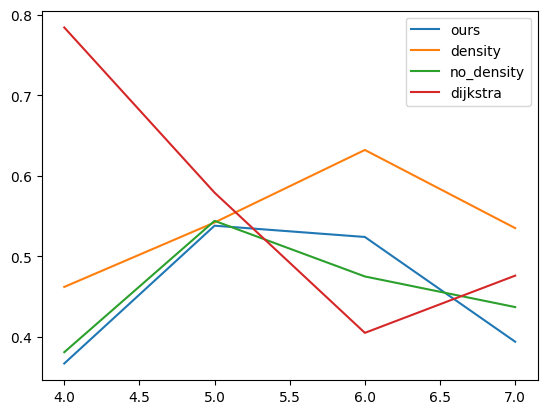

In [48]:
res_df = pd.DataFrame(spearmans).T.reset_index()
res_df['seed'] = res_df['index'].apply(lambda x: x.split("_")[1])
res_df['method'] = res_df['index'].apply(lambda x: x.split("_")[2])
res_df['bcv'] = res_df['index'].apply(lambda x: x.split("_")[-3])
res_df['dropout'] = res_df['index'].apply(lambda x: x.split("_")[-2])
res_df.drop(columns=['index'], inplace=True)

mean_df = res_df.groupby(['method', 'bcv', 'dropout']).mean().round(3)
std_df = res_df.groupby(['method', 'bcv', 'dropout']).std().round(3)

# Merge the mean and std dataframes
combined_df = mean_df.merge(std_df, left_index=True, right_index=True, suffixes=('_mean', '_std'))

plusminus = ''

combined_df_str = combined_df.copy()  # Copy the dataframe to store the formatted results
# Format the results into a single column for each feature
for col in mean_df.columns:  # Iterate directly through the columns
    combined_df_str[col] = combined_df[col+'_mean'].astype(str) + f" ({plusminus}" + combined_df[col+'_std'].astype(str) + ")"
    # Since we're directly modifying the combined_df, no need to drop the columns in this loop
# Drop the original mean and std columns after processing
combined_df_no_exp = combined_df_str.loc[:, ~combined_df_str.columns.str.contains('_mean|_std')]
combined_df_no_exp.drop(['seed'], axis=1, inplace=True)

combined_df1 = combined_df.reset_index()
combined_df1 = combined_df1[combined_df1['method'] == 'groups']
plt.plot(combined_df1['ours_mean'])
plt.plot(combined_df1['density_mean'])
plt.plot(combined_df1['no_density_mean'])
# plt.plot(combined_df1['dijkstra_mean'])
plt.plot(combined_df1['dijkstra_knn30_mean'])
# plt.legend(['ours', 'density', 'no_density', 'dijkstra', 'dijkstra_knn30'])
plt.legend(['ours', 'density', 'no_density', 'dijkstra'])
plt.show()

combined_df1 = combined_df.reset_index()
combined_df1 = combined_df1[combined_df1['method'] == 'paths']
plt.plot(combined_df1['ours_mean'])
plt.plot(combined_df1['density_mean'])
plt.plot(combined_df1['no_density_mean'])
# plt.plot(combined_df1['dijkstra_mean'])
plt.plot(combined_df1['dijkstra_knn30_mean'])
# plt.legend(['ours', 'density', 'no_density', 'dijkstra', 'dijkstra_knn30'])
plt.legend(['ours', 'density', 'no_density', 'dijkstra'])
plt.show()

In [49]:
combined_df1['ours_mean']

4    0.367
5    0.538
6    0.524
7    0.394
Name: ours_mean, dtype: float64

/tmp/ipykernel_2986042/1782724216.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_no_exp.drop(['seed'], axis=1, inplace=True)


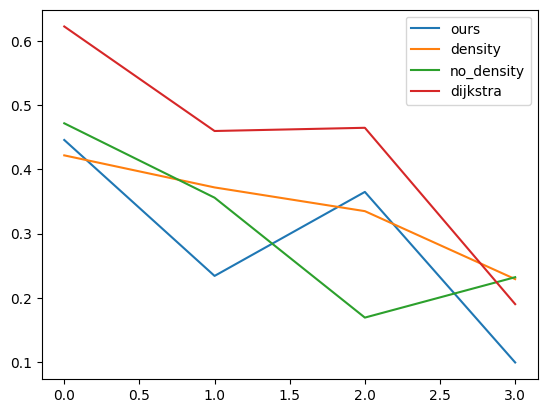

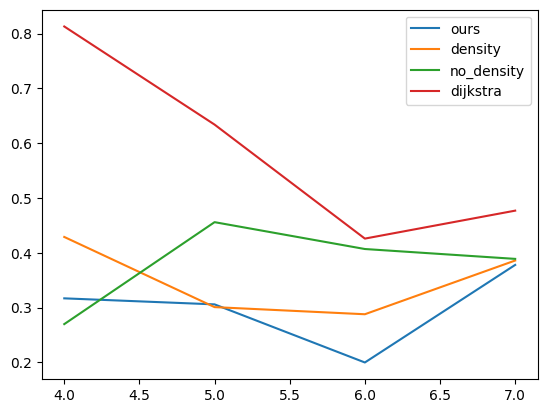

In [50]:
res_df = pd.DataFrame(corrs).T.reset_index()
res_df['seed'] = res_df['index'].apply(lambda x: x.split("_")[1])
res_df['method'] = res_df['index'].apply(lambda x: x.split("_")[2])
res_df['bcv'] = res_df['index'].apply(lambda x: x.split("_")[-3])
res_df['dropout'] = res_df['index'].apply(lambda x: x.split("_")[-2])
res_df.drop(columns=['index'], inplace=True)

mean_df = res_df.groupby(['method', 'bcv', 'dropout']).mean().round(3)
std_df = res_df.groupby(['method', 'bcv', 'dropout']).std().round(3)

# Merge the mean and std dataframes
combined_df = mean_df.merge(std_df, left_index=True, right_index=True, suffixes=('_mean', '_std'))

plusminus = ''

combined_df_str = combined_df.copy()  # Copy the dataframe to store the formatted results
# Format the results into a single column for each feature
for col in mean_df.columns:  # Iterate directly through the columns
    combined_df_str[col] = combined_df[col+'_mean'].astype(str) + f" ({plusminus}" + combined_df[col+'_std'].astype(str) + ")"
    # Since we're directly modifying the combined_df, no need to drop the columns in this loop
# Drop the original mean and std columns after processing
combined_df_no_exp = combined_df_str.loc[:, ~combined_df_str.columns.str.contains('_mean|_std')]
combined_df_no_exp.drop(['seed'], axis=1, inplace=True)


combined_df1 = combined_df.reset_index()
combined_df1 = combined_df1[combined_df1['method'] == 'groups']
plt.plot(combined_df1['ours_mean'])
plt.plot(combined_df1['density_mean'])
plt.plot(combined_df1['no_density_mean'])
# plt.plot(combined_df1['dijkstra_mean'])
plt.plot(combined_df1['dijkstra_knn30_mean'])
# plt.legend(['ours', 'density', 'no_density', 'dijkstra', 'dijkstra_knn30'])
plt.legend(['ours', 'density', 'no_density', 'dijkstra'])
plt.show()

combined_df1 = combined_df.reset_index()
combined_df1 = combined_df1[combined_df1['method'] == 'paths']
plt.plot(combined_df1['ours_mean'])
plt.plot(combined_df1['density_mean'])
plt.plot(combined_df1['no_density_mean'])
# plt.plot(combined_df1['dijkstra_mean'])
plt.plot(combined_df1['dijkstra_knn30_mean'])
# plt.legend(['ours', 'density', 'no_density', 'dijkstra', 'dijkstra_knn30'])
plt.legend(['ours', 'density', 'no_density', 'dijkstra'])
plt.show()

/tmp/ipykernel_2986042/2557910783.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_no_exp.drop(['seed'], axis=1, inplace=True)


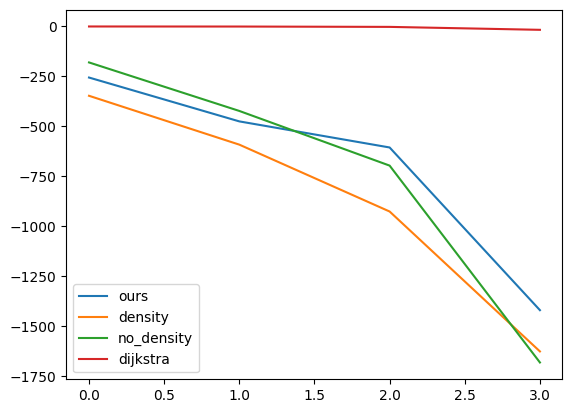

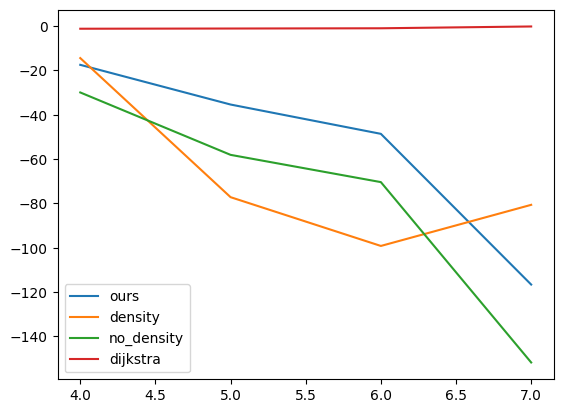

In [51]:
res_df = pd.DataFrame(r2scores).T.reset_index()
res_df['seed'] = res_df['index'].apply(lambda x: x.split("_")[1])
res_df['method'] = res_df['index'].apply(lambda x: x.split("_")[2])
res_df['bcv'] = res_df['index'].apply(lambda x: x.split("_")[-3])
res_df['dropout'] = res_df['index'].apply(lambda x: x.split("_")[-2])
res_df.drop(columns=['index'], inplace=True)

mean_df = res_df.groupby(['method', 'bcv', 'dropout']).mean().round(3)
std_df = res_df.groupby(['method', 'bcv', 'dropout']).std().round(3)

# Merge the mean and std dataframes
combined_df = mean_df.merge(std_df, left_index=True, right_index=True, suffixes=('_mean', '_std'))

plusminus = ''

combined_df_str = combined_df.copy()  # Copy the dataframe to store the formatted results
# Format the results into a single column for each feature
for col in mean_df.columns:  # Iterate directly through the columns
    combined_df_str[col] = combined_df[col+'_mean'].astype(str) + f" ({plusminus}" + combined_df[col+'_std'].astype(str) + ")"
    # Since we're directly modifying the combined_df, no need to drop the columns in this loop
# Drop the original mean and std columns after processing
combined_df_no_exp = combined_df_str.loc[:, ~combined_df_str.columns.str.contains('_mean|_std')]
combined_df_no_exp.drop(['seed'], axis=1, inplace=True)


combined_df1 = combined_df.reset_index()
combined_df1 = combined_df1[combined_df1['method'] == 'groups']
plt.plot(combined_df1['ours_mean'])
plt.plot(combined_df1['density_mean'])
plt.plot(combined_df1['no_density_mean'])
# plt.plot(combined_df1['dijkstra_mean'])
plt.plot(combined_df1['dijkstra_knn30_mean'])
# plt.legend(['ours', 'density', 'no_density', 'dijkstra', 'dijkstra_knn30'])
plt.legend(['ours', 'density', 'no_density', 'dijkstra'])
plt.show()

combined_df1 = combined_df.reset_index()
combined_df1 = combined_df1[combined_df1['method'] == 'paths']
plt.plot(combined_df1['ours_mean'])
plt.plot(combined_df1['density_mean'])
plt.plot(combined_df1['no_density_mean'])
# plt.plot(combined_df1['dijkstra_mean'])
plt.plot(combined_df1['dijkstra_knn30_mean'])
# plt.legend(['ours', 'density', 'no_density', 'dijkstra', 'dijkstra_knn30'])
plt.legend(['ours', 'density', 'no_density', 'dijkstra'])
plt.show()